# Raices de funciones

En muchos problemas buscamos conocer el valor $\hat x$ que cumple la condición $f(\hat x)=0$. Este valor se le llama la raiz o cero de la función $f(x)$.

Podemos usar métodos iterativos para aproximar el error absoluto $\vert f(\hat x)-0 \vert <= \varepsilon$, para una tolerancia dada $\varepsilon$.

Los métodos iterativos van a construir una secuencia de valores $x_i \mapsto \hat x$ tal que $i=1 \ldots n$ siendo $n$ la cantidad total de iteraciones.

## Método de Newton

Este método utiliza una expansi\'on de Taylor de primer orden para encontrar raices. Si $f(x)$ es continua en el intervalo $[a,b]$, entonces repetimos la siguiente iteraci\'on:


1.- $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.$ 

2.- Continuar
    


In [2]:
function newton_raphson(f::Function,df::Function,a,eps,N)
    n=1
    x=0. 
    x_old=a
    while n<=N
        x=x_old-f(x_old)/df(x_old)
        y=f(x)
        if f(x)==0 || abs(x-x_old)<eps
            return y,x,n
        end
        x_old=x
        n=n+1 
    end
    println("Method did not converge. The last iteration gives $x with
    function value $f(x)")
end
            

newton_raphson (generic function with 1 method)

In [5]:
f(x)=x^5+2x^3-5x-2
df(x)=5x^4+6x^2-5
y,x,n=newton_raphson(f,df,0,eps(),20)
print("El valor de x es $x, iteraciones : $n")

El valor de x es -0.4364131329990945, iteraciones : 5

In [6]:
err=abs(f(x))
print("error absoluto : $err")

error absoluto : 0.0

In [7]:
using Pkg;

Pkg.add("Roots");

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [8]:
using Roots;

x_r=find_zero((f,df),0, Roots.Newton())

-0.4364131329990945

In [10]:
x==x_r

true

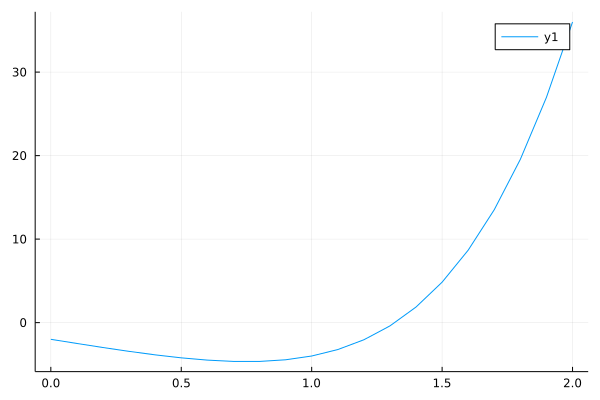

In [14]:
using Plots

x=0:0.1:2
y=f.(x)

plot(x,y)

https://github.com/JuliaMath/Roots.jl#multiple-zeros

In [15]:
find_zeros(f, -2,  2)

3-element Vector{Float64}:
 -1.0
 -0.43641313299909457
  1.3196411672093118

In [16]:
y,x,n=newton_raphson(f,df,1.0,eps(),100)
print("El valor de x es $x, iteraciones : $n")

El valor de x es 1.3196411672093118, iteraciones : 8

# Metodo de la Secante

El metodo de la secante utiliza una aproximación numerica de la derivada. 
		
1.- $x_{n+1} = x_n - \frac{f(x_n)\left( x_n - x_{n-1} \right)}{f(x_n) -
            f(x_{n-1})}.$ 

2.- Repetir hasta alcanzar la tolerancia especificada $\vert x_{n+1} - x_n \vert \leq \varepsilon$.
	

In [17]:
function secant(f::Function,a,b,eps,N)
    n=1
    x=0. # to ensure the value of p carries out of the while loop
    x_old=a
    x_temp=b 
    while n<=N
        x=x_old-f(x_old)*(x_old-x_temp)/(f(x_old)-f(x_temp))
        y=f(x)
        if y==0 || abs(x-x_old)<eps
            return y,x,n
        end
    x_temp=x_old
    x_old=x
    n=n+1
    end
    y=f(x)
    println("Method did not converge. The last iteration gives $x with function value $y")
end

secant (generic function with 1 method)

In [18]:
y,x,n=secant(f,0,0.1,eps(),20)
print("El valor de x es $x, iteraciones : $n")

El valor de x es -0.4364131329990945, iteraciones : 8

# Tarea 

1.- Usando los métodos de la secante, Newton-Raphson y bisección, calcular el cero en el intervalo indicado de las funciones siguientes con un error $\varepsilon =10^{-6}$ usando el criterio de parada $|x_n-x_{n-1}|\leq\epsilon$:
    
a) $f(x)=\mathrm{e}^x+2\cos x-7=0$, para $x$ en el intervalo $[2,3]$.
    
b) $f(x)=\ln x-\frac{1}{20}\mathrm{e}^x=0$, para $x$ en el intervalo $[1,2]$.

2.- Estimar el orden de convergencia para distintos valores de $\varepsilon$. 



In [20]:
Pkg.add("ForwardDiff");

   Resolving package versions...


   Installed DiffResults ────────── v1.0.3
   Installed DiffRules ──────────── v1.11.1
   Installed CommonSubexpressions ─ v0.3.0


   Installed ForwardDiff ────────── v0.10.32


    Updating `~/.julia/environments/v1.7/Project.toml`
  [f6369f11] + ForwardDiff v0.10.32
    Updating `~/.julia/environments/v1.7/Manifest.toml`
  [bbf7d656] + CommonSubexpressions v0.3.0
  [163ba53b] + DiffResults v1.0.3
  [b552c78f] + DiffRules v1.11.1
  [f6369f11] + ForwardDiff v0.10.32


Precompiling project...


  ✓ CommonSubexpressions


  ✓ DiffResults


  ✓ DiffRules


  ✓ ForwardDiff
  4 dependencies successfully precompiled in 5 seconds (147 already precompiled)


In [87]:
function bisection(f::Function,a,b,eps,N)
    n=1
    c=0
    while n<=N
        c=a+(b-a)/2
        println("($a,$b)")
        if f(c)==0 || abs(a-b)<=eps
            break
        end
        if f(a)f(c)<0
            b=c
        else
            a=c
        end
        n+=1
    end
    y=f(c)
    return y,c,n,a,b
end

bisection (generic function with 1 method)

# Funcion 1

a) $f(x)=\mathrm{e}^x+2\cos x-7=0$, para $x$ en el intervalo $[2,3]$.

In [33]:
using ForwardDiff

f1(x)=exp(x)+2*cos(x)-7
df1(x)=exp(x)-2*sin(x)
D1(f1) = x -> ForwardDiff.derivative(f1,float(x))

D1 (generic function with 1 method)

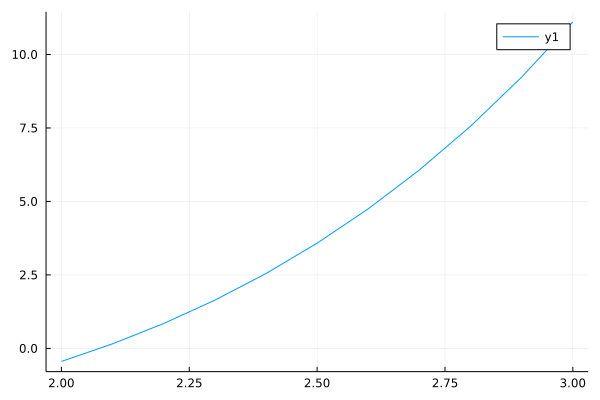

In [53]:
r=2.0:0.1:3.0

plot(r,f1.(r))

In [54]:
y,x,n=newton_raphson(f1,df1,2.5,eps(),100)
print("Metodo de Newton : El valor de x es $x, iteraciones : $n")

Metodo de Newton : El valor de x es 2.0752694070309663, iteraciones : 6

In [68]:
y,x,n=newton_raphson(f1,D1(f1),2.5,eps(),100)
print("Metodo de Newton (AutoDiff): El valor de x es $x, iteraciones : $n")

Metodo de Newton (AutoDiff): El valor de x es 2.0752694070309663, iteraciones : 6

In [82]:
tracker = Roots.Tracks()
x=find_zero(f1, (2.0,3.0), Roots.Bisection(),tracks=tracker)
n=tracker.steps
print("Metodo de la Biseccion : El valor de x es $x, iteraciones : $n")

Metodo de la Biseccion : El valor de x es 2.0752694070309663, iteraciones : 50

In [88]:
y,x,n,a,b=bisection(f1,2,3,eps(),51)
print("Metodo de la Biseccion : El valor de x es $x, iteraciones : $n")

(2,3)
(2,2.5)
(2,2.25)
(2,2.125)
(2.0625,2.125)
(2.0625,2.09375)
(2.0625,2.078125)
(2.0703125,2.078125)
(2.07421875,2.078125)
(2.07421875,2.076171875)
(2.0751953125,2.076171875)
(2.0751953125,2.07568359375)
(2.0751953125,2.075439453125)
(2.0751953125,2.0753173828125)
(2.07525634765625,2.0753173828125)
(2.07525634765625,2.075286865234375)
(2.07525634765625,2.0752716064453125)
(2.0752639770507812,2.0752716064453125)
(2.075267791748047,2.0752716064453125)
(2.075267791748047,2.0752696990966797)
(2.0752687454223633,2.0752696990966797)
(2.0752692222595215,2.0752696990966797)
(2.0752692222595215,2.0752694606781006)
(2.075269341468811,2.0752694606781006)
(2.075269401073456,2.0752694606781006)
(2.075269401073456,2.075269430875778)
(2.075269401073456,2.075269415974617)
(2.075269401073456,2.0752694085240364)
(2.075269404798746,2.0752694085240364)
(2.0752694066613913,2.0752694085240364)
(2.0752694066613913,2.075269407592714)
(2.0752694066613913,2.0752694071270525)
(2.075269406894222,2.075269407127

In [89]:
tracker

Results of univariate zero finding:

* Converged to: 2.0752694070309663
* Algorithm: Bisection()
* iterations: 50
* function evaluations ≈ 53
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol

Trace:
(a₀, b₀) = ( 2, 2.5 )
(a₁, b₁) = ( 2, 2.25 )
(a₂, b₂) = ( 2, 2.125 )
(a₃, b₃) = ( 2.0625, 2.125 )
(a₄, b₄) = ( 2.0625, 2.09375 )
(a₅, b₅) = ( 2.0625, 2.078125 )
(a₆, b₆) = ( 2.0703125, 2.078125 )
(a₇, b₇) = ( 2.07421875, 2.078125 )
(a₈, b₈) = ( 2.07421875, 2.076171875 )
(a₉, b₉) = ( 2.0751953125, 2.076171875 )
(a₁₀, b₁₀) = ( 2.0751953125, 2.07568359375 )
(a₁₁, b₁₁) = ( 2.0751953125, 2.075439453125 )
(a₁₂, b₁₂) = ( 2.0751953125, 2.0753173828125 )
(a₁₃, b₁₃) = ( 2.07525634765625, 2.0753173828125 )
(a₁₄, b₁₄) = ( 2.07525634765625, 2.075286865234375 )
(a₁₅, b₁₅) = ( 2.07525634765625, 2.0752716064453125 )
(a₁₆, b₁₆) = ( 2.0752639770507812, 2.0752716064453125 )
(a₁₇, b₁₇) = ( 2.0752677917480469, 2.0752716064453125 )
(a₁₈, b₁₈) = ( 2.0752677917480469, 2.0752696990966797 )
(a₁₉, b₁₉) = ( 2.0

In [98]:
tol=[1e-1,1e-2,1e-3,1e-6,1e-9,1e-12,1e-14,eps()]

n_iter_nr=Vector{Float64}()
n_iter_sec=Vector{Float64}()
n_iter_bis=Vector{Float64}()

for e in tol
    y,x,n=newton_raphson(f1,df1,2.5,e,100)
    append!(n_iter_nr, n)
    y,x,n=secant(f1,2.0,3.0,e,100)
    append!(n_iter_sec, n)
end
    

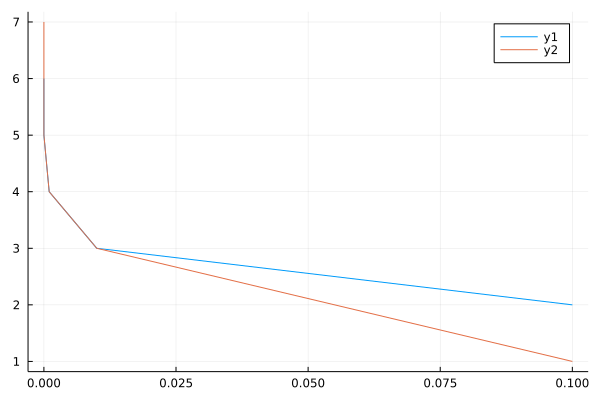

In [99]:
plot(tol,n_iter_nr)
plot!(tol,n_iter_sec)